# <center>**ML EXPERIMENT NO: 06**

## **Name : Harshil Shah**
## **Roll no : 15**
## **Batch : A**
## **Class : BE-9**
## **Aim : To implement Density-based Spatial Clustering of applications with noise (DBSCAN).**

##**1 | Importing Libraries and Loading dataset**


In [ ]:
# Mounting
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Reading the dataset
path='/content/gdrive/MyDrive/ML/'
file = path + 'Mall_Customers.csv'

data = pd.read_csv(file)
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


##**2 | Understanding Our data**

In [ ]:
data.shape

(200, 5)

In [ ]:
data.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
132,133,Female,25,72,34
143,144,Female,32,76,87
173,174,Male,36,87,92
34,35,Female,49,33,14
147,148,Female,32,77,74
168,169,Female,36,87,27
47,48,Female,27,40,47
198,199,Male,32,137,18
95,96,Male,24,60,52
131,132,Male,39,71,75


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
data.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [ ]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**There are no null values in our dataset!**

In [ ]:
data.duplicated().sum()

0

**There are no duplicates in our dataset!**

### **This Data set contains details of 200 customer's Annual income and Spending Score.**
There are 5 columns:

* Customer ID - numerical - unique customer number - integer
* Gender - categorical - binary (Male/Female)
* Age - numerical - integer
* Annual Income (k$) - numerical - integer
* Spending Score (1-100) - numerical - integer

##**3 | Exploratory Data Analysis**


In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


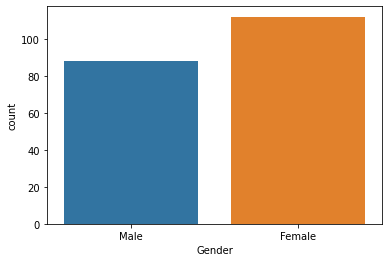

In [ ]:
sns.countplot(data=data,x='Gender')
plt.show()

###**Visualising the Categorical Variables**

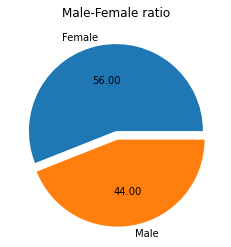

In [ ]:
plt.pie(data['Gender'].value_counts(),labels=data['Gender'].value_counts().index,autopct='%.2f',explode=[0,0.1])
plt.title("Male-Female ratio")
plt.show()

**Observations:**

**The dataset contains more samples with Female candidates. Females are 56% of the total.**

###**Visualising 'Age' and 'Annual Income' as a subset of males and females.**

**1) Visualising 'Age' with males and females.**

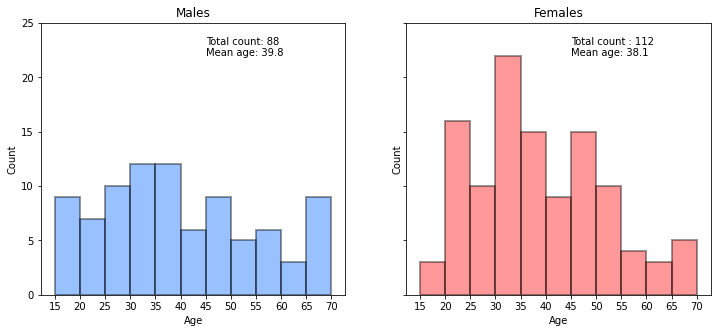

In [ ]:
males_age = data[data['Gender']=='Male']['Age'] # subset with males age
females_age = data[data['Gender']=='Female']['Age'] # subset with females age

age_bins = range(15,75,5)

# males histogram
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5), sharey=True)
sns.distplot(males_age, bins=age_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(age_bins)
ax1.set_ylim(top=25)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(45,23, "Total count: {}".format(males_age.count()))
ax1.text(45,22, "Mean age: {:.1f}".format(males_age.mean()))

#females histogram
sns.distplot(females_age,bins=age_bins,kde=False, color='red',ax=ax2,hist_kws=dict(edgecolor='k',linewidth=2))
ax2.set_xticks(age_bins)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(45,23, 'Total count : {}'.format(females_age.count()))
ax2.text(45,22, "Mean age: {:.1f}".format(females_age.mean()))

plt.show()

**Observations:**
* **The average age of male customers is lightly higher than female ones (39.8 versus 38.1). Distribution of male age is more uniform than females, where we can observe that the biggest age group is 30-35 years old.**





**2) Visualising 'Annual Income' with males and females.**

**Observations:**
* **Mean income of males is higher than females (62.2k vs. 59.2k).Also median income of male customers(62.5k) is higher than female ones (60k). Standard deviation is similar for both groups. There is one outlier in male group with an annual income of about 140k$.**

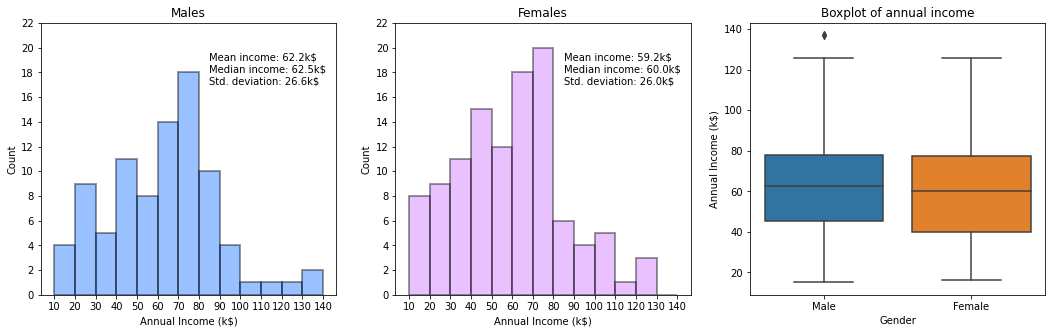

In [ ]:
males_income = data[data['Gender']=='Male']['Annual Income (k$)'] # subset with males income
females_income = data[data['Gender']=='Female']['Annual Income (k$)'] # subset with females income

my_bins = range(10,150,10)

# males histogram
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,5))
sns.distplot(males_income, bins=my_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(my_bins)
ax1.set_yticks(range(0,24,2))
ax1.set_ylim(0,22)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(85,19, "Mean income: {:.1f}k$".format(males_income.mean()))
ax1.text(85,18, "Median income: {:.1f}k$".format(males_income.median()))
ax1.text(85,17, "Std. deviation: {:.1f}k$".format(males_income.std()))

# females histogram
sns.distplot(females_income, bins=my_bins, kde=False, color='#cc66ff', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(my_bins)
ax2.set_yticks(range(0,24,2))
ax2.set_ylim(0,22)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(85,19, "Mean income: {:.1f}k$".format(females_income.mean()))
ax2.text(85,18, "Median income: {:.1f}k$".format(females_income.median()))
ax2.text(85,17, "Std. deviation: {:.1f}k$".format(females_income.std()))

# boxplot
sns.boxplot(x='Gender', y='Annual Income (k$)', data=data, ax=ax3)
ax3.set_title('Boxplot of annual income')
plt.show()

##**4 | Clustering using DBSCAN**

In [ ]:
from sklearn.cluster import DBSCAN

####**In DBSCAN there are two major hyperparameters:**

* **eps**
* **min_samples**
####**It is difficult arbitrarily to say what values will work the best. Therefore, we will have to first create a matrix of investigated combinations.**

In [ ]:
from itertools import product

eps_values = np.arange(8,12.75,0.25) # eps values to be investigated
min_samples = np.arange(3,10) # min_samples values to be investigated

DBSCAN_params = list(product(eps_values, min_samples))

**Because DBSCAN creates clusters itself based on those two parameters, let's check the number of generated clusters.**

In [ ]:
from sklearn.metrics import silhouette_score
X_numerics = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] # subset with numeric variables only
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X_numerics)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(X_numerics, DBS_clustering.labels_))

**We will use a heatplot to see how many clusters will be generated by the DBSCAN algorithm for the respective parameters combinations.**

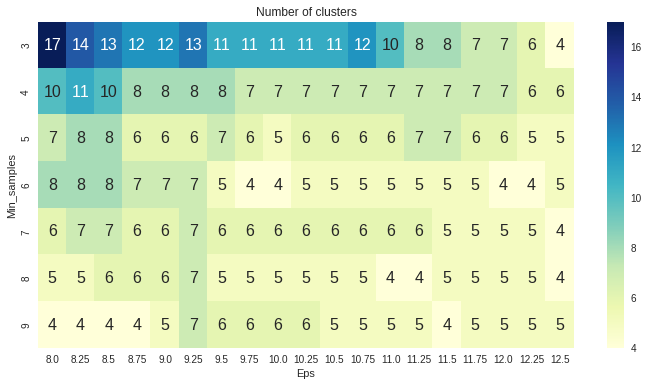

In [ ]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

**The heatplot above shows that the number of clusters vary from 17 to 4. However, most of the combinations gives 4-7 clusters. To decide which combination to choose we will use a metric - a silhuette score and plot it as a heatmap again.**

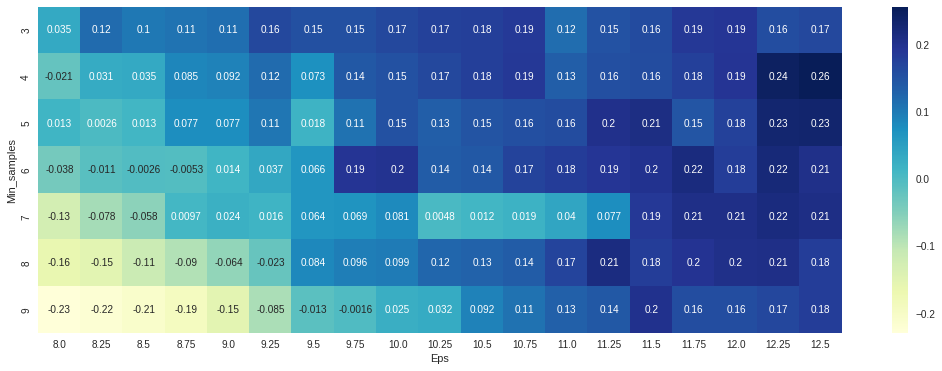

In [ ]:
mp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

**Global maximum is 0.26 for eps=12.5 and min_samples=4.**

In [ ]:
DBS_clustering = DBSCAN(eps=12.5, min_samples=4).fit(X_numerics)

DBSCAN_clustered = X_numerics.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points

**Checking sizes of clusters.**

In [ ]:
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,18
0,112
1,8
2,34
3,24
4,4


**DBSCAN created 5 clusters plus outliers cluster (-1). Sizes of clusters 0-4 vary significantly - some have only 4 or 8 observations. There are 18 outliers.**

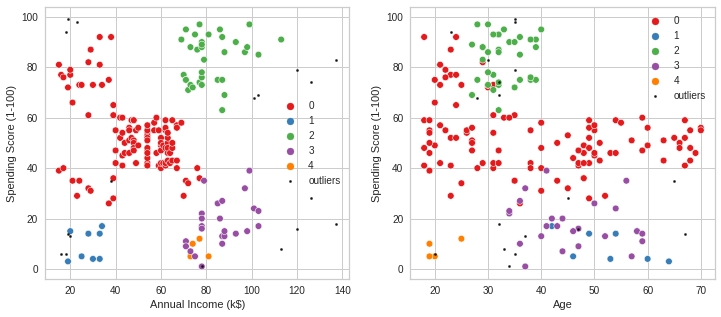

In [ ]:
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster']==-1]

fig2, (axes) = plt.subplots(1,2,figsize=(12,5))


sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)

sns.scatterplot('Age', 'Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45)

axes[0].scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[1].scatter(outliers['Age'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')

plt.show()

##**Conclusion: Hence, I have successfully used DBSCAN algorithm to classify the data points using clusters. The above graph shows different clusters which are made. From this, we can infer that DBSCAN works better when the data points are scattered and distributed unevenly. Two parameters are required for DBSCAN clustering 1) min_pts 2) eplison, these can be obtained by plotting a heatplot and analyzing the number of clusters made using different parameter combinations.**